# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review any of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

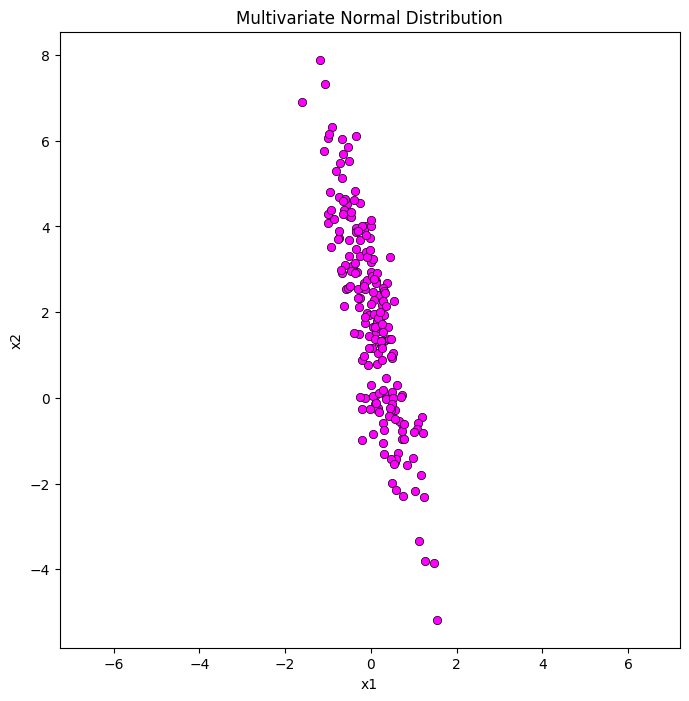

In [43]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# setting the size of the graph
plt.rcParams['figure.figsize'] = 8, 8

# setting the mean of the distribution
mean = np.array([0, 2])

# initializing covariance matrix
cov = np.array([[0.3, -1], [-1, 5]])

# generating the normal distribution with the given parameters
distrib = multivariate_normal(cov = cov, mean = mean)

# generating 200 samples
data = distrib.rvs(size = 200)

# plotting the distribution
plt.plot(data[:,0], data[:,1], 'o', c="magenta", markeredgewidth = 0.5, markeredgecolor = "black")
plt.title('Multivariate Normal Distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')

plt.show()

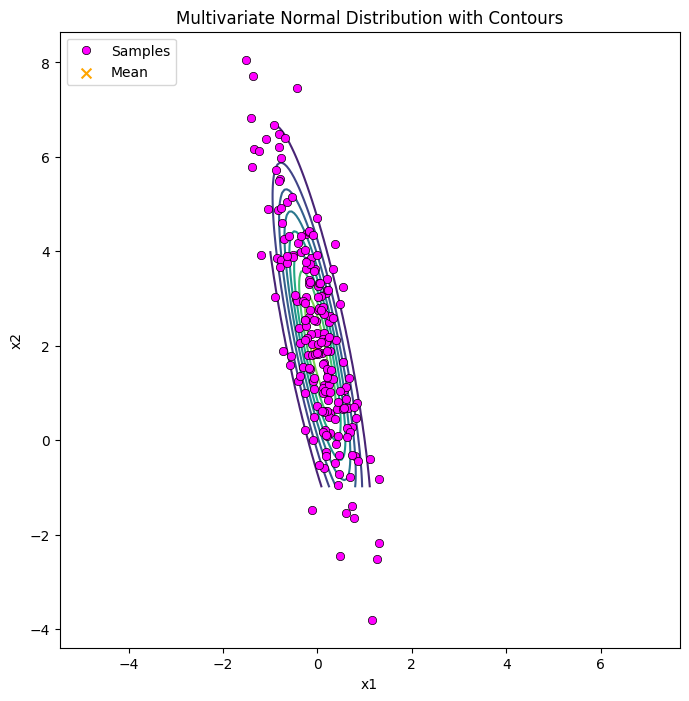

In [44]:
# plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = 8, 8

# setting the mean of the distribution
mean = np.array([0, 2])

# initializing covariance matrix
cov = np.array([[0.3, -1], [-1, 5]])

# generating the normal distribution with the given parameters
distrib = multivariate_normal(cov = cov, mean = mean)

# generating 200 samples
data = distrib.rvs(size = 200)

# creating a meshgrid for the contour plot
x, y = np.meshgrid(np.linspace(-1, 4, 100), np.linspace(-1, 7, 100))
pos = np.dstack((x, y))

# calculating the probability density function (PDF) values
pdf_values = distrib.pdf(pos)

# plotting the contour lines of the distribution
plt.contour(x, y, pdf_values, levels=10, cmap='viridis')

# plotting the distribution
plt.plot(data[:,0], data[:,1], 'o', c="magenta", markeredgewidth = 0.5, markeredgecolor = "black", label='Samples')

# marking the mean on the graph
plt.scatter(mean[0], mean[1], marker='x', color='orange', s=50, label='Mean')

# labelling the graph
plt.title('Multivariate Normal Distribution with Contours')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.legend(loc='upper left')

plt.show()

## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix by sampling m = 1000 3D vectors from this distribution.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) of the covariance matrix compute the projection of the m simulated vectors onto the subspace spanned by the first two principal components (or left singular vectors of the covariance matrix).

### Problem 2A (5 points)

What determines the principal components ? Show the vectors which denote the first 2 principal components.

### Problem 2B (5 points)

Plot the projected vectors in the subspace of first 2 principal components.

### Problem 2C (10 points)

Reverse the projection to map back to the original 3D space and create a scatter plot to show the reconstructed points. Do the reconstructed points have identical/similar but not identical/different correlations in respective components as the original matrix?



First PC:  [-0.70173922 -0.60421021 -0.37748125]
Second PC:  [ 0.68097512 -0.41315066 -0.60463164]


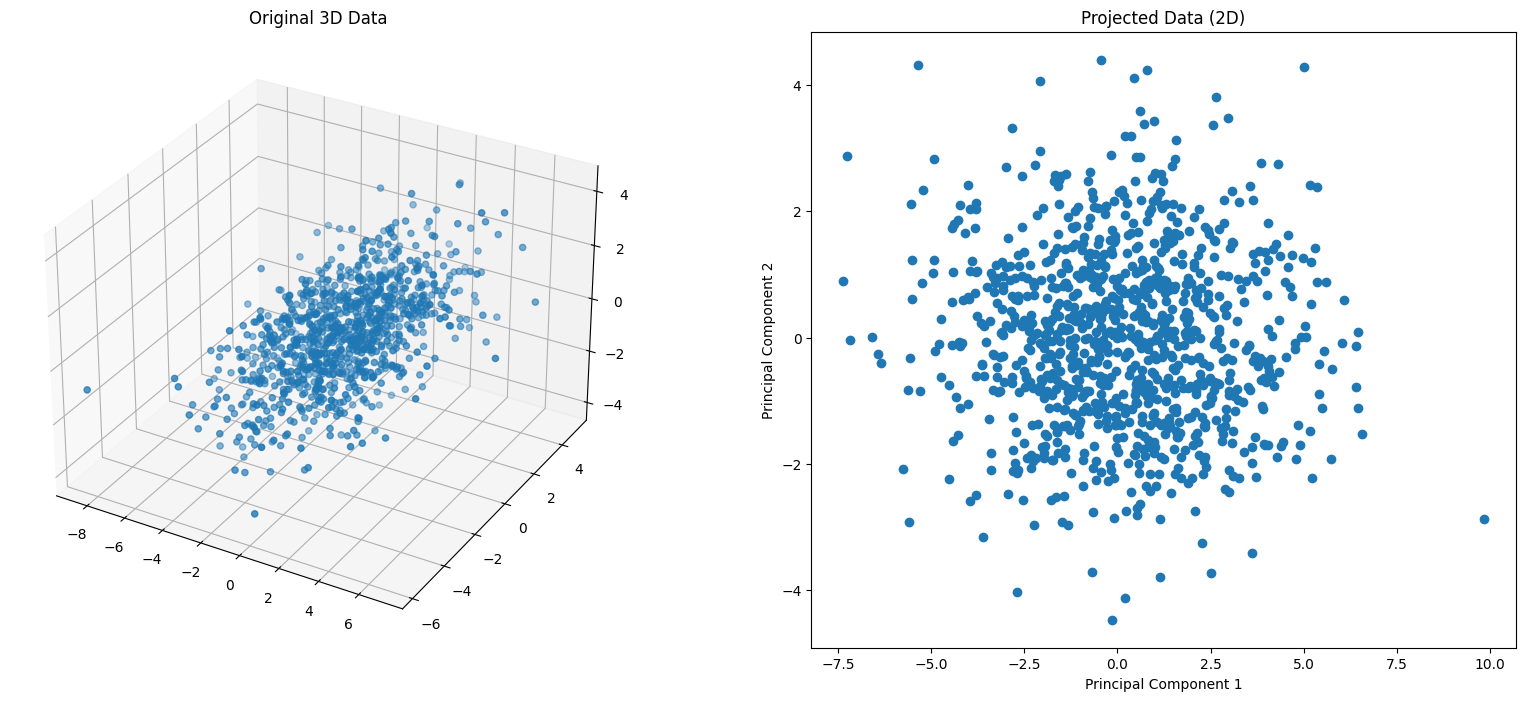

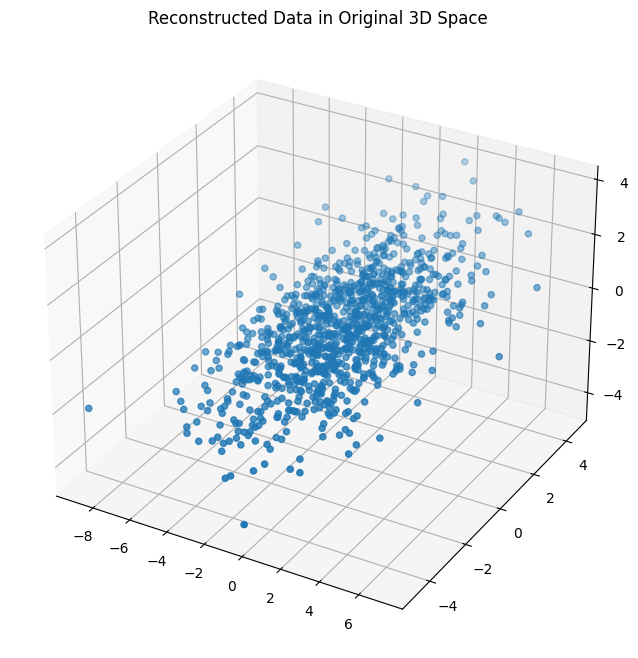

<Figure size 800x800 with 0 Axes>

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(1000)

# Simulate a 3-dimensional Gaussian random vector
mean = np.zeros(3)
covariance_matrix = np.array([[4.0, 2.0, 1.0],
                              [2.0, 3.0, 1.5],
                              [1.0, 1.5, 2.0]])

# Generate 1000 samples
data = np.random.multivariate_normal(mean, covariance_matrix, size=1000)

# Perform Singular Value Decomposition (SVD) taken from numpy.linalg.svd documentation.
U, S, Vh = np.linalg.svd(covariance_matrix)

# Extract the first two principal components which come from U --- Problem 2A
principal_components = U[:, :2]
print('First PC: ', principal_components[:, 0])
print('Second PC: ', principal_components[:, 1])

# Plot the original 3D data
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2])
ax1.set_title('Original 3D Data')

# Project the data onto the subspace spanned by the first two principal components --- Problem 2B
projected_data = np.dot(data, principal_components)

# Plot the projected data in 2D
ax2 = fig.add_subplot(122)
ax2.scatter(projected_data[:, 0], projected_data[:, 1])
ax2.set_title('Projected Data (2D)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

#Reconstruct the 3D data from the projected data --- Problem 2C
recon_data = np.dot(projected_data, principal_components.T)

# Plot the reconstructed data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(recon_data[:, 0], recon_data[:, 1], recon_data[:, 2])
ax.set_title('Reconstructed Data in Original 3D Space')
plt.show()

plt.tight_layout()
plt.show()

### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the [linear regression example from the class notes](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/regression/linear-regression/linear_regression.html), develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

Degree of polynomial =  3
Learning Rate =  0.01
Number of Epochs =  300
Batch Size =  50


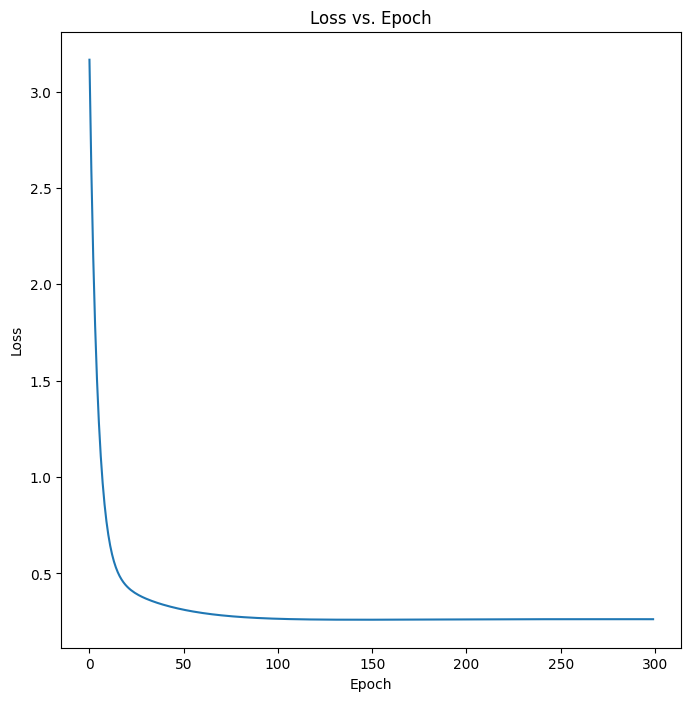

In [108]:
np.random.seed(1000)

# Functions to generate dummy data
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)



# This is the function that declares our hypothesis and calculates the output value when our data point is given as input
def hypothesis_function(x, degree):
    # the polynomial being used is 1+x+x^2+x^3
    # the use of np.vstack() will give us a vertically stacked array of all the output values. we return the transpose of that array
    return np.vstack([x**i for i in range(0, degree+1)]).T

# defining the function for Stochastic Gradient Descent
def sgd(x_train, y_train, degree, learning_rate, epochs, batch_size):
    # initializing random wights
    theta = np.random.randn(degree+1)
    losses = []

    for epoch in range(epochs):

        # calculate the number of batches
        num_batches = len(x_train) // batch_size

        for i in range(num_batches):
            # take a batch of data from our dataset
            xi = x_train[(i * batch_size):((i + 1) * batch_size)]
            yi = y_train[(i * batch_size):((i + 1) * batch_size)]

            # generate hypothesis data from our batch of original data
            Xi = hypothesis_function(xi, degree)
            Yi = np.dot(Xi, theta)

            # calculate the loss of that batch
            loss = np.mean((Yi - yi)**2)

            # calculate the gradient
            gradient = 2 * np.dot(Xi.T, (Yi-yi)) / len(xi)

            # update the weights according to the gradient
            theta = theta - (learning_rate * gradient)

        losses.append(loss)

    return losses

# generating data using our data gen function
x_train, y_train = create_toy_data(sinusoidal, 200, 0.25)

# hyperparameters
degree = 3
learning_rate = 0.01
epochs = 300
batch_size = 50

losses = sgd(x_train, y_train, degree, learning_rate, epochs, batch_size)

print('Degree of polynomial = ', degree)
print('Learning Rate = ', learning_rate)
print('Number of Epochs = ', epochs)
print('Batch Size = ', batch_size)

plt.plot(losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement some enhancements to the implementation of Problem 3 (the linear regression problem) that can improve the convergence speed of the algorithm. Implement from scratch the following enhancements and compare the convergence speed of each algorithm to the baseline SGD algorithm

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and compared to the baseline SGD algorithm. You can include all plots in the same figure.

### SGD with Momentum

Degree of polynomial =  3
Learning Rate =  0.01
Number of Epochs =  300
Batch Size =  50
Momentum =  0.9


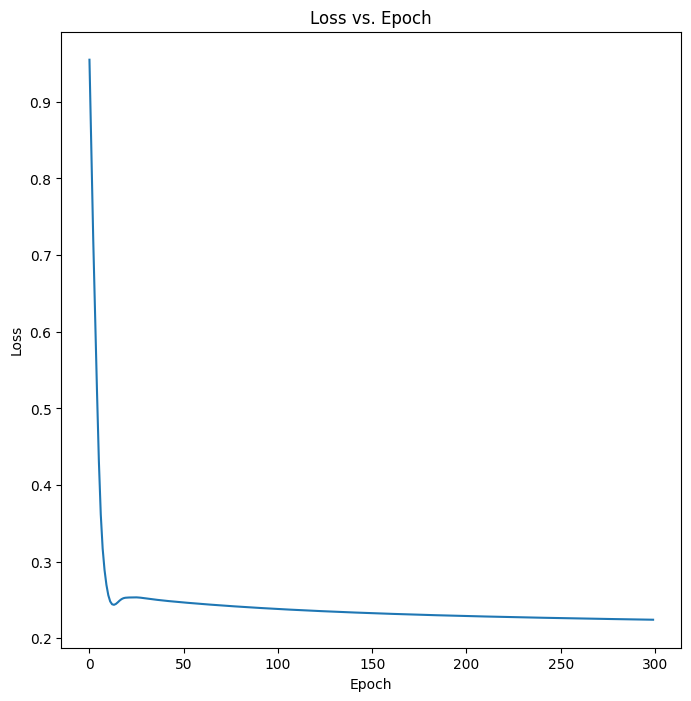

In [109]:
np.random.seed(1000)

# Defining the function for Stochastic Gradient Descent with Momentum
def momentum_sgd(x_train, y_train, degree, learning_rate, epochs, batch_size, momentum):
  # initializing random wights
  theta = np.random.randn(degree+1)

  # defining the velocity
  velocity = np.zeros_like(theta)

  losses = []

  for epoch in range(epochs):
    # calculate the number of batches
    num_batches = len(x_train) // batch_size

    for i in range(num_batches):
      # take a batch of data from our dataset
      xi = x_train[(i * batch_size):((i + 1) * batch_size)]
      yi = y_train[(i * batch_size):((i + 1) * batch_size)]

      # generate hypothesis data from our batch of original data
      Xi = hypothesis_function(xi, degree)
      Yi = np.dot(Xi, theta)

      # calculate the loss of that batch using MSE
      loss = np.mean((Yi - yi)**2)

      # calculate the gradient
      gradient = 2 * np.dot(Xi.T, (Yi-yi)) / len(xi)

      # update the velocity vector using the momentum hyperparamter
      velocity = (momentum * velocity) + (learning_rate * gradient)

      # update the weights using the velocity vector
      theta = theta - velocity

    losses.append(loss)

  return losses

# hyperparameters
degree = 3
learning_rate = 0.01
epochs = 300
batch_size = 50
momentum = 0.9

momentum_losses = momentum_sgd(x_train, y_train, degree, learning_rate, epochs, batch_size, momentum)

print('Degree of polynomial = ', degree)
print('Learning Rate = ', learning_rate)
print('Number of Epochs = ', epochs)
print('Batch Size = ', batch_size)
print('Momentum = ', momentum)

plt.plot(momentum_losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### SGD with Adam

Degree of polynomial =  3
Learning Rate =  0.01
Number of Epochs =  300
Batch Size =  50
Beta1 =  0.9
Beta2 =  0.999
Epsilon =  1e-08


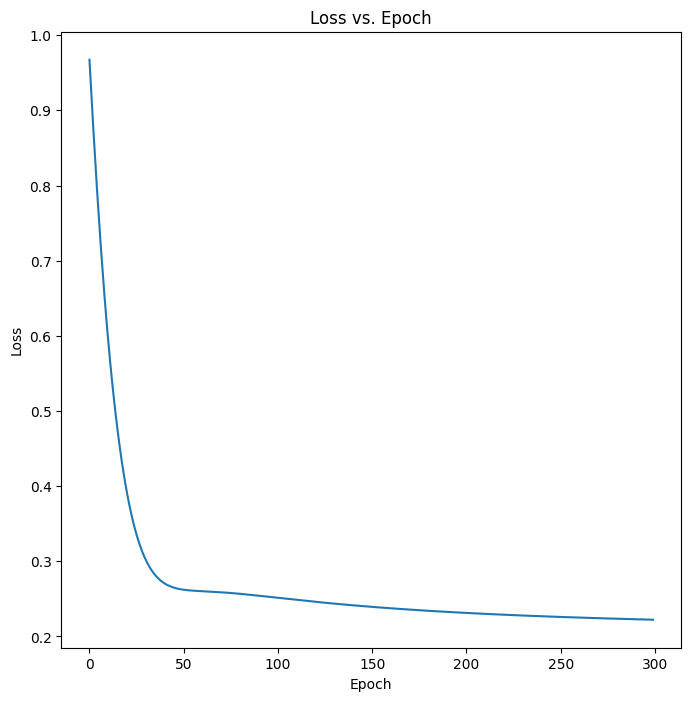

In [110]:
np.random.seed(1000)

# Defining the function for Stochastic Gradient Descent with Adam
def adam_sgd(x_train, y_train, degree, learning_rate, epochs, batch_size, beta1, beta2, epsilon):
  # initializing random wights
  theta = np.random.randn(degree+1)

  losses = []

  # initializing the parameters required for Adam namely mu, nu, and the time variable
  mu = np.zeros_like(theta)
  nu = np.zeros_like(theta)
  time = 0

  for epoch in range(epochs):
    # calculate the number of batches
    num_batches = len(x_train) // batch_size

    for i in range(num_batches):
      # take a batch of data from our dataset
      xi = x_train[(i * batch_size):((i + 1) * batch_size)]
      yi = y_train[(i * batch_size):((i + 1) * batch_size)]

      # generate hypothesis data from our batch of original data
      Xi = hypothesis_function(xi, degree)
      Yi = np.dot(Xi, theta)

      # calculate the loss of that batch using MSE
      loss = np.mean((Yi - yi)**2)

      # calculate the gradient
      gradient = 2 * np.dot(Xi.T, (Yi-yi)) / len(xi)

      # increment the time counter
      time += 1
      # update the values of mu and nu
      mu = beta1 * mu + (1 - beta1) * gradient
      nu = beta2 * nu + (1 - beta2) * (gradient ** 2)
      muHat = mu / (1 - beta1 ** time)
      nuHat = nu / (1 - beta2 ** time)

      # update the weights using the calculated values of muHat and nuHat
      theta = theta - (learning_rate * muHat / (np.sqrt(nuHat) + epsilon))

    losses.append(loss)

  return losses

# hyperparameters
degree = 3
learning_rate = 0.01
epochs = 300
batch_size = 50
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

adam_losses = adam_sgd(x_train, y_train, degree, learning_rate, epochs, batch_size, beta1, beta2, epsilon)

print('Degree of polynomial = ', degree)
print('Learning Rate = ', learning_rate)
print('Number of Epochs = ', epochs)
print('Batch Size = ', batch_size)
print('Beta1 = ', beta1)
print('Beta2 = ', beta2)
print('Epsilon = ', epsilon)

plt.plot(adam_losses)
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Comparison Plot

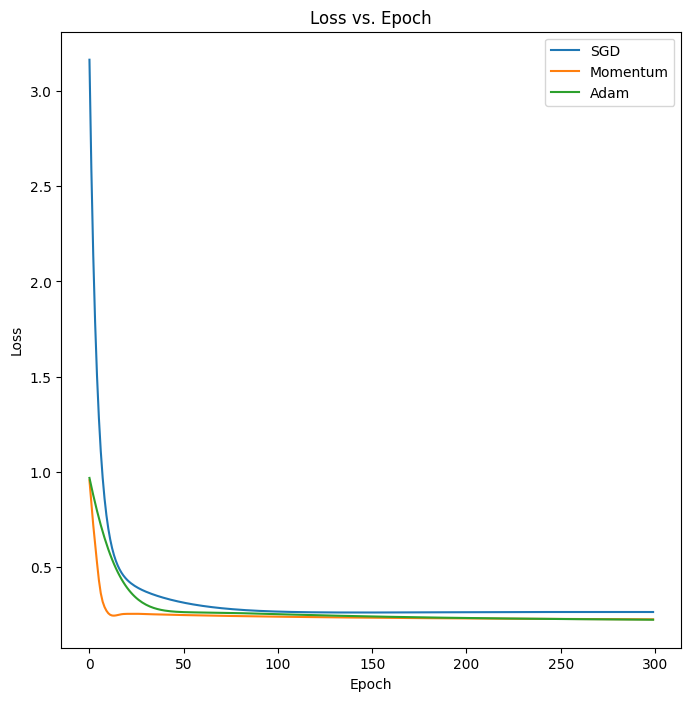

In [111]:
plt.plot(losses, label='SGD')
plt.plot(momentum_losses, label='Momentum')
plt.plot(adam_losses, label='Adam')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()